# GeophPy Workshop: Basic Survey Operations

This notebook demonstrates the basic, non-geophysical operations that can be performed on a `Survey` object. We will explore how to retrieve information, and perform spatial and arithmetic transformations.

**By the end of this tutorial, you will know how to:**
* Get statistical and spatial information from a `Survey` object.
* Apply spatial transformations like `rotate`, `crop`, and `translate`.
* Apply arithmetic operations like `add` and `set_mean`.
* Use method chaining for a clean, readable workflow.

In [1]:
# --- Imports ---
from geophpy import Survey
import geophpy
import matplotlib.pyplot as plt
import os

# Displays the version to check the environment
print(f"Using GeophPy version: {geophpy.__version__}")

Using GeophPy version: 0.35.1


In [3]:
# --- Load the Data ---
data_dir = os.path.join('..', 'data')
data_file = 'Mag_ex1.dat'
filepath = os.path.join(data_dir, data_file)
print(filepath)


survey = Survey.from_file(
    filepath,
    #delimiter=',',
    skiprows=1,
    x_colnum=0,
    y_colnum=1,
    z_colnum=4
)

if survey:
    print(f"Successfully created Survey object: '{survey.name}'")

..\data\Mag_ex1.dat
Successfully created Survey object: 'Mag_ex1'


### 1. Information and Statistics (`InfoMixin` & `StatsMixin`)

Once a survey is loaded, you can easily retrieve information about its data.

In [9]:
# Get statistics from the raw point data
print("--- Point Data Stats ---")
point_stats = survey.get_point_stats(verbose=True)

# Get the bounding box of the raw points
bbox = survey.get_points_bounding_box()
print(f"\nPoints Bounding Box:\n{bbox}")

# To get grid information, we first need to interpolate
print("\n--- Interpolating Data ---")
survey.interpolate(x_step=0.5, y_step=0.5)

# Now we can get grid-specific information
print("\n--- Grid Info ---")
grid_extent = survey.get_grid_extent()
grid_centroid = survey.get_grid_centroid()
print(f"Grid Extent (xmin, xmax, ymin, ymax): {grid_extent}")
print(f"Grid Centroid (x, y): {grid_centroid}")

--- Point Data Stats ---
Point Data Statistics for 'Mag_ex1':
  - Min: -59.44
  - Max: 137.46
  - Mean: 0.23
  - Stdev: 5.44

Points Bounding Box:
[[ 0.     0.112]
 [58.     0.112]
 [ 0.    49.89 ]
 [58.    49.89 ]]

--- Interpolating Data ---

--- Grid Info ---
Grid Extent (xmin, xmax, ymin, ymax): (np.float64(0.0), np.float64(58.0), np.float64(0.1), np.float64(49.9))
Grid Centroid (x, y): (np.float64(29.0), np.float64(25.0))


### 2. Spatial Operations (`SpatialMixin`)

The methods in the `SpatialMixin` allow you to transform the survey data. By default, they return a new, modified `Survey` object, which allows for powerful method chaining.

#### 2a. Rotating and cropping the Grid

The `.rotate_grid()` method shifts the entire grid's coordinate system without changing the data itself. This is useful for correcting a global offset in your survey's positioning.

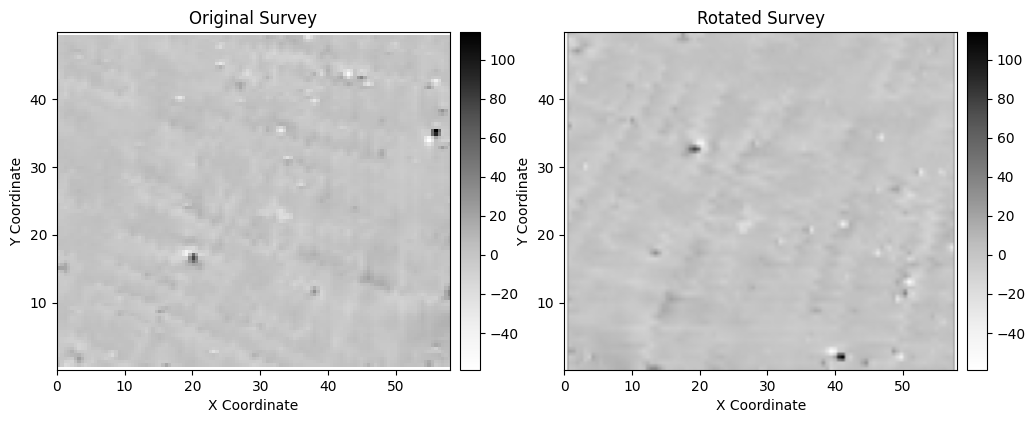

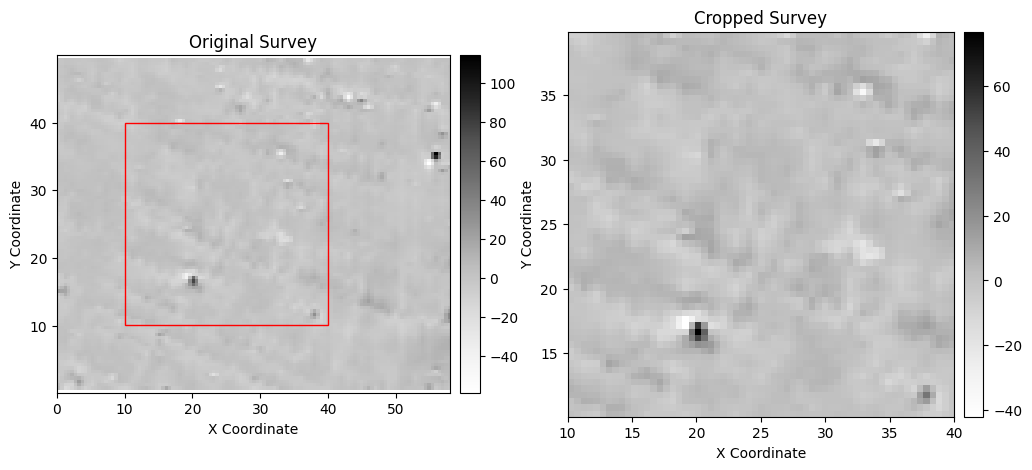

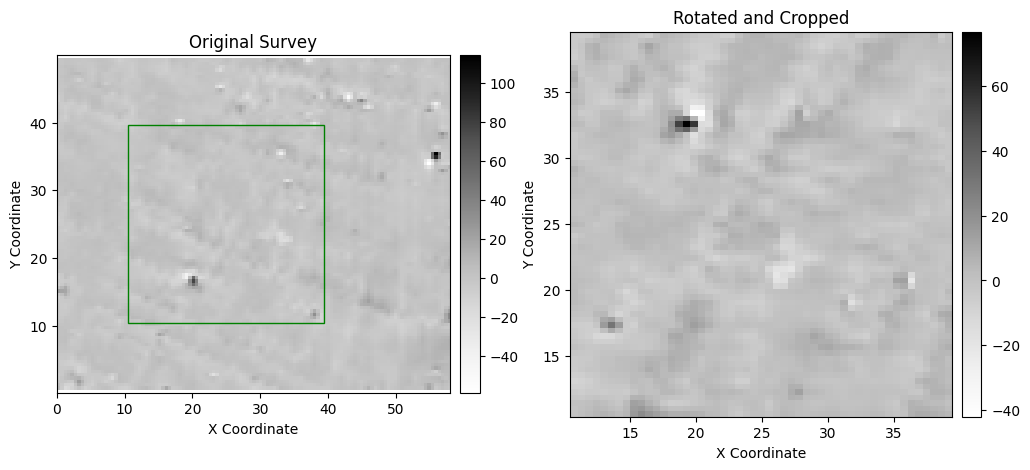

In [5]:
if survey.grid:
    fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    survey.plot('2D-SURFACE', ax=ax1, title='Original Survey')


    # Rotate the survey by 90 degrees
    rotated_survey = survey.rotate_grid(90)
    rotated_survey.plot('2D-SURFACE', ax=ax2, title='Rotated Survey')
#    fig1, ax1 = rotated_survey.plot('2D-SURFACE', title='Rotated Survey')
    plt.show()

    # Crop the original survey
    fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    cropped_survey = survey.crop_grid(xmin=10, xmax=40, ymin=10, ymax=40)
    crp_xmin, crp_xmax, crp_ymin, crp_ymax = cropped_survey.get_grid_extent()
    crop_rectangle = [crp_xmin, crp_ymin, crp_xmax - crp_xmin, crp_ymax - crp_ymin]
    survey.plot('2D-SURFACE', ax=ax1, title='Original Survey', rects=[crop_rectangle])
    cropped_survey.plot('2D-SURFACE', ax=ax2, title='Cropped Survey')
    plt.show()

    # --- Method Chaining ---
    # We can chain operations for a clean, readable workflow
    fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    processed_survey = survey.rotate_grid(90).crop_grid(xmin=10, xmax=40, ymin=10, ymax=40)
    processed_survey.plot('2D-SURFACE',ax=ax2, title='Rotated and Cropped')

    proc_xmin, proc_xmax, proc_ymin, proc_ymax = processed_survey.get_grid_extent()
    proc_rectangle = [proc_xmin, proc_ymin, proc_xmax - proc_xmin, proc_ymax - proc_ymin]
    survey.plot('2D-SURFACE', ax=ax1, title='Original Survey', rects=[proc_rectangle], rect_color='g')
    plt.show()

#### 2b. Translating the Grid

The `.translate_grid()` method shifts the entire grid's coordinate system without changing the data itself. This is useful for correcting a global offset in your survey's positioning.

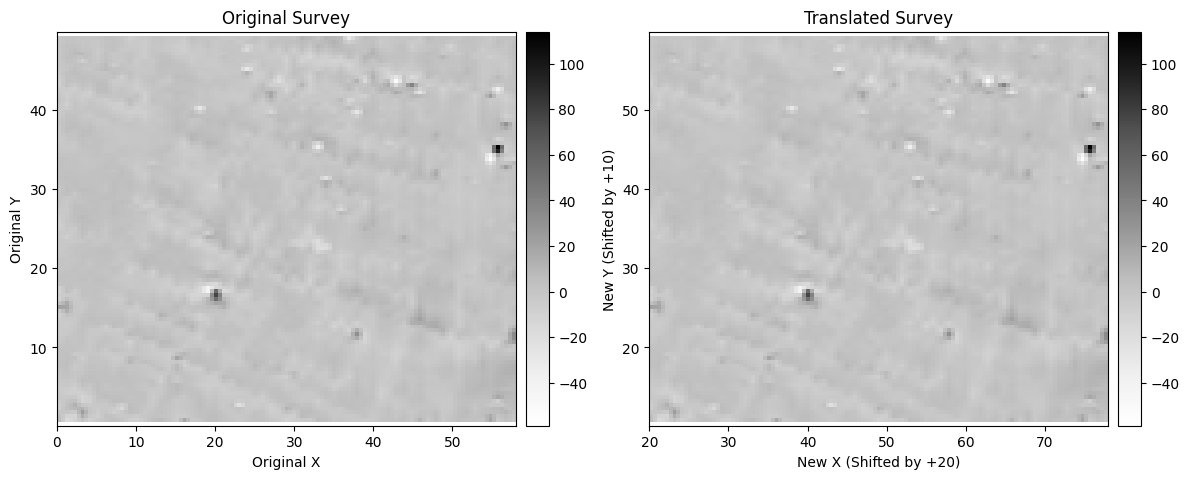

Original Extent:  (np.float64(0.0), np.float64(58.0), np.float64(0.1), np.float64(49.9))
Translated Extent: (np.float64(20.0), np.float64(78.0), np.float64(10.1), np.float64(59.9))


In [6]:
if survey.grid:
    # --- Translate the Survey ---
    # We will shift the grid by 20 units in X and 10 units in Y
    translated_survey = survey.translate_grid(x_shift=20, y_shift=10)

    # --- Visualize the Before and After ---
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    survey.plot('2D-SURFACE', ax=ax1, title='Original Survey')
    ax1.set_xlabel("Original X")
    ax1.set_ylabel("Original Y")

    translated_survey.plot('2D-SURFACE', ax=ax2, title='Translated Survey')
    ax2.set_xlabel("New X (Shifted by +20)")
    ax2.set_ylabel("New Y (Shifted by +10)")
    
    plt.tight_layout()
    plt.show()

    # We can verify by checking the grid extent
    print("Original Extent: ", survey.get_grid_extent())
    print("Translated Extent:", translated_survey.get_grid_extent())

#### 2c. Flipping the Grid

The `.flip_grid()` method mirrors the grid along either the horizontal or vertical axis. This can be useful for correcting data that was recorded with an inverted sensor orientation.

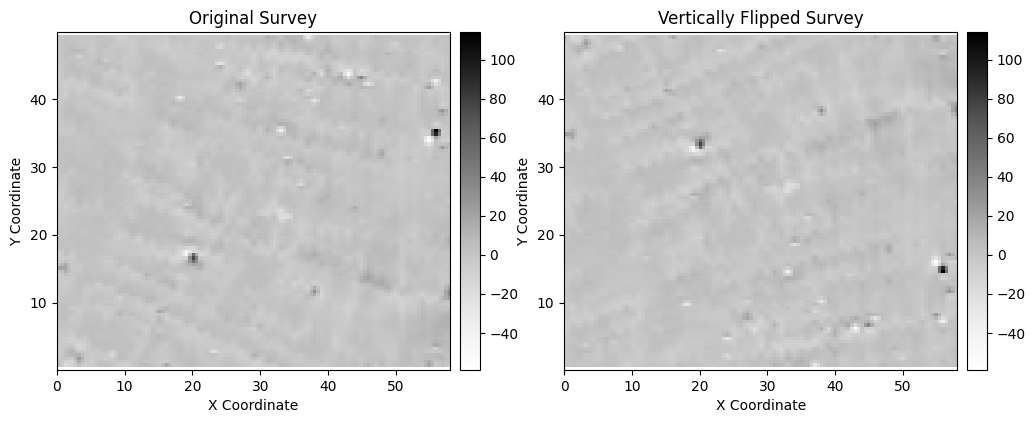

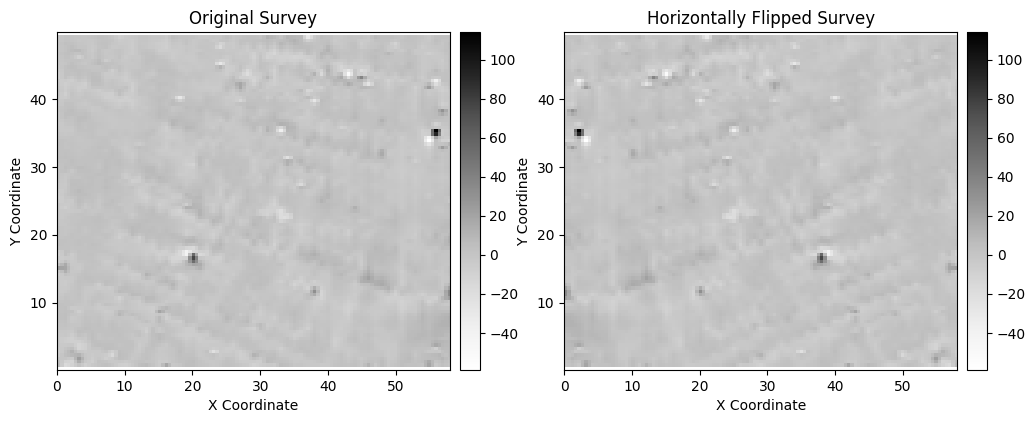

In [7]:
if survey.grid:
    # --- Flip the Survey ---
    # We will perform a vertical flip
    vflipped_survey = survey.flip_grid(direction='vertical')

    # --- Visualize the Before and After ---
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    survey.plot('2D-SURFACE', ax=ax1, title='Original Survey')
    vflipped_survey.plot('2D-SURFACE', ax=ax2, title='Vertically Flipped Survey')
    
    plt.show()

    # We will perform a vHorizont flip
    hflipped_survey = survey.flip_grid(direction='horizontal')

    # --- Visualize the Before and After ---
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    survey.plot('2D-SURFACE', ax=ax1, title='Original Survey')
    hflipped_survey.plot('2D-SURFACE', ax=ax2, title='Horizontally Flipped Survey')
    
    plt.show()

### 3. Arithmetic Operations (`ArithmeticMixin`)

You can also perform simple arithmetic on the data values. Let's add a constant value to our processed survey.

{'min': np.float64(-58.84915859030845), 'max': np.float64(114.0173333333334), 'mean': np.float64(0.2575131900068312), 'stdev': np.float64(4.738500293706088)}
Mean value before adding 100: 0.26
Mean value after adding 50:  50.26
--- Processing History for 'Mag_ex1' ---
{'step': 'message', 'parameters': {'text': "Survey object 'Mag_ex1' created"}}
{'step': 'message', 'parameters': {'text': "Data loaded from '..\\data\\Mag_ex1.dat' into Survey object 'Mag_ex1'."}}
{'step': 'interpolate', 'parameters': {'method': 'linear', 'x_step': 0.5, 'y_step': 0.5}}


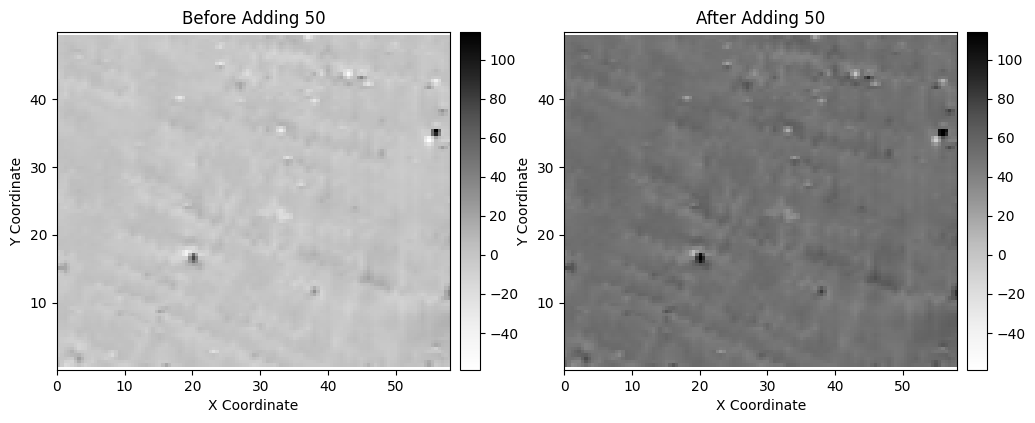

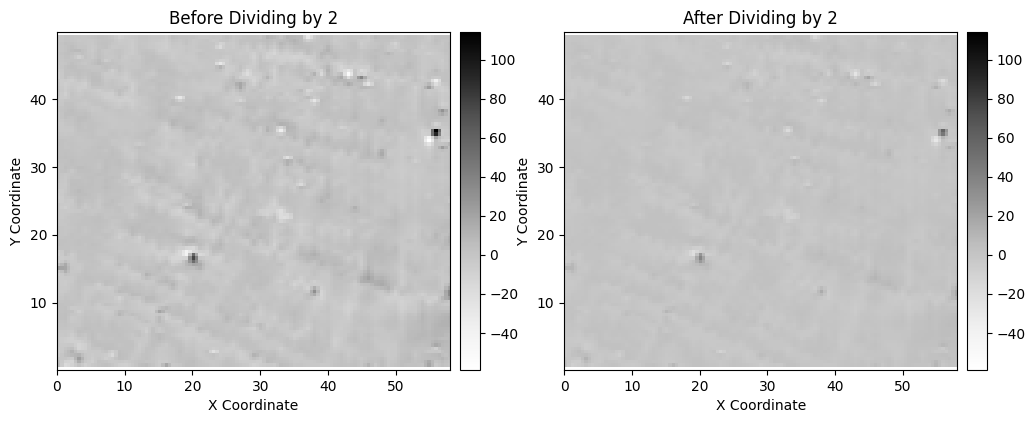

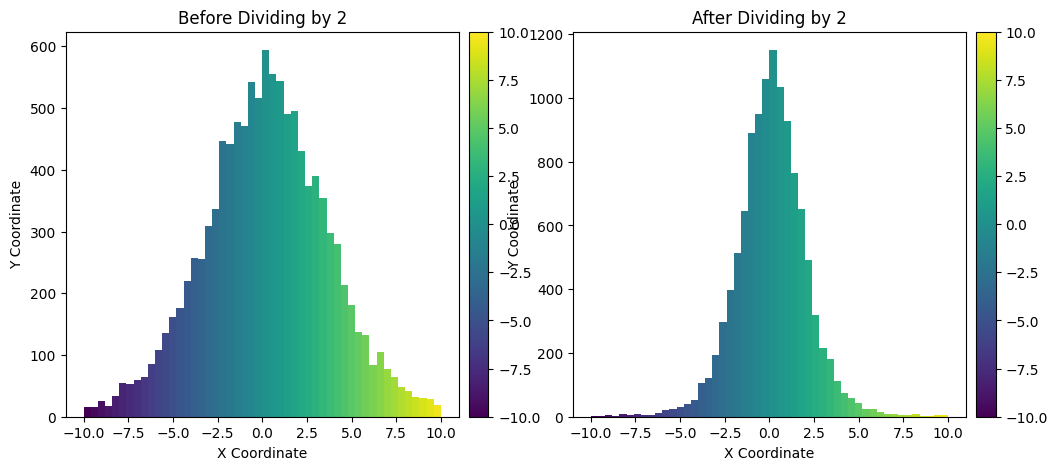

--- Processing History for 'Mag_ex1' ---
{'step': 'message', 'parameters': {'text': "Survey object 'Mag_ex1' created"}}
{'step': 'message', 'parameters': {'text': "Data loaded from '..\\data\\Mag_ex1.dat' into Survey object 'Mag_ex1'."}}
{'step': 'interpolate', 'parameters': {'method': 'linear', 'x_step': 0.5, 'y_step': 0.5}}


In [8]:
if 'survey' in locals():
    # Add value to all grid values
    stats_before = survey.get_grid_stats()
    print(stats_before)
    print(f"Mean value before adding 100: {stats_before['mean']:.2f}")
    
    add_value = 50
    added_survey = survey.add_to_grid(add_value)
    
    stats_after = added_survey.get_grid_stats()
    print(f"Mean value after adding {add_value}:  {stats_after['mean']:.2f}")

    # The color bar limits should now be shifted by 10
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    survey.plot('2D-SURFACE', fig=fig, ax=ax1)
    ax1.set_title(f"Before Adding {add_value}")
    # Let's inspect the history of the new object
    print(f"--- Processing History for '{survey.name}' ---")
    for step in survey.history:
        print(step)

    added_survey.plot('2D-SURFACE', fig=fig, ax=ax2, vmin=stats_before['min'], vmax=stats_before['max'])
    ax2.set_title(f"After Adding {add_value}")

    # Divide all grid values by value
    div_value = 2
    divided_survey = survey.divide_grid_by(div_value)

    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    survey.plot('2D-SURFACE', fig=fig, ax=ax1)
    ax1.set_title(f"Before Dividing by {div_value}")

    divided_survey.plot('2D-SURFACE', fig=fig, ax=ax2, vmin=stats_before['min'], vmax=stats_before['max'])
    ax2.set_title(f"After Dividing by {div_value}")

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    #fig, ax = survey.plot_points_histogram(bins=50, colored=True, cmap='viridis', range=(-10, 10))
    survey.plot_grid_histogram(fig=fig, ax=ax1, bins=50, colored=True, cmap='viridis', range=(-10, 10))  
    ax1.set_title(f"Before Dividing by {div_value}")

    divided_survey.plot_grid_histogram(fig=fig, ax=ax2, bins=50, range=(-10, 10))
    ax2.set_title(f"After Dividing by {div_value}")

    plt.show()

    # Let's inspect the history of the new object
    print(f"--- Processing History for '{survey.name}' ---")
    for step in survey.history:
        print(step)

 